<hr style="height:5px;border-width:0;color:orange;background-color:orange">
    <center> <span style="font-size: 38px;"> Renfe trains dataset </span> </center>

+ Author: **Alejandro Sánchez Silvestre**
+ Date: **February 2024**
+ Module: **Data Cleaning & Business Inteligence**

<hr style="height:5px;border-width:0;color:orange;background-color:orange">


# Intro

**Datos:**

1. `renfe.csv`: Información de búsquedas de billetes que se hicieron en la página de Renfe.
2. `coordenadas_ciudades.csv`: Latitud y longitud de provincias españolas.


**OBJETIVO**

Queremos usar estos datasets para un modelo de Machine Learning que utilizaremos para predecir los precios de los billetes. Y, para ello, necesitamos limpiar, explorar y pre-procesar el dataset.

**Diccionario de datos**

Esta es la información provista:

### `renfe.csv`
- `FECHA_CONSULTA`: Fecha en la que se consultó la página. Fechas van desde
- `FECHA_INICIO`: Fecha de inicio del trayecto.
- `FECHA_FIN`: Fecha de finalización del trayecto.
- `CIUDAD_ORIGEN`: Ciudad de origen del trayecto.
- `CIUDAD_DESTINO`: Ciudad destino del trayecto.
- `TIPO_TREN`: Tipo de tren.
- `TIPO_TARIFA`: Tipo de tarifa del billete.
- `CLASE`: Clase del asiento seleccionado.
- `PRECIO`: Precio del tren seleccionado.

### `coordenadas_ciudades.csv`
- `ciudad`: Nombre de la ciudad.
- `latitud`: Coordenada de latitud de la ciudad.
- `longitud`: Coordenada de longitud de la ciudad.


**ROAD MAP Y OUTLINE**: 
- **Intro**
- **Pipeline summary**: 
    1. **Comprensión del problema/negocio**
    2. **Entendimiento de los datos**: EDA uni y bivariante
    3. **Preprocesamiento**
    4. **Modelización**: Baseline
    5. **First Iteration**: XGBoost con 7 features importantes + target
    6. **Second Iteration**: Lista de 3 modelos (Random Forest, Gradient Boosting y XGBoost) con 7 features + target.
    7. **Third Iteration**: XGBoost optimizado con hiperparametros  y entrenado con datos ampliados (20 col + target)
- **Conclusion**





<hr style="height:5px;border-width:0;color:orange;background-color:orange">

# **PIPELINE SUMMARY**

Resumen sacado de ppts a modo de roadmap original. 

1. **COMPRENSION DEL NEGOCIO**
Compresion del problema a resolver, la clase que se precide y las variables del problema.



2. **ENTENDIMIENTO DE LOS DATOS**
Identificacion de las fuentes de informacion, descripción y analisis de los datos. Esta etapa comprende:

    2.1 ANALISIS UNIVARIANTE DE LOS DATOS:Deberemos hacer un EDA pasando por los siguientes pasos
    - Tamaño del Dataset
    - Informacion basica del Dataset: exploracion columnas, filas, tipos de datos...modificar tipos de datos si necesario
    - Analisis estadistico descriptivo de las variables
    - Identificacion de Nulos y posterior tratamiento
    - Identificacion de Duplicados
    - Busqueda de Outliers y decision de tratamiento sobre estos (atipicos naturales o errores)
    - Correlacion de las variables con la variable target(variable target: PRECIO)
    - Visualizacion grafica de las distribuciones 

    2.2 ANALISIS MULTIVARIANTE:
    - Distribucion de variantes de 2 a 2
    - Correlacion de las variantes de 2 a 2
    - Cross-tabs
    - Correlacion de combinaciones de variante con la clase




3. **PREPARACION DE LOS DATOS**

    3.1 LIMPIEZA DE ATRIBUTOS:
    - Ajuste de tipos.
    - Imputacion de valores nulos (0, media, mediana, moda, otro valor...)
    - Correlacion de valores atipicos o eliminacion atipicos
    - eliminacion de atributos de baja varianza o elevada correlacion con otros


    3.2 TRANSFORMACION DE ATRIBUTOS
    - *Variables CATEGORICAS*: One-Hot-Enconding, Label-encoding, agrupacion de valores...
    - *Variables NUMERICAS*: Escalado(min-max,Standarization..), Categorizacion de variables numericas, Redondeo
    - *Variables de FECHA*: Conversion a tiempo, Agregacion, Diferencias...
    - *Variable de TEXTO*: Normalizacion de textos, vectorizacion de textos, word embedings

    3.3 GENERACION DE ATRIBUTOS:
    - Feature engeniering: destilacion de nuevas variabels utiles a partir de datos exisitentes
    - Añade una variable aleatoria al modelo

    3.4 SELECCION DE LOS DATOS
    - Muestreo de los registros
    - Seleccion de atributos/Reduccion de dismensionalidad


4. **MODELIZACION**
Etapa donde **seleccionaremos el modelo** en función del problema a resolver entre los distintos modelos disponibles.

    4.1 PARTICION Y MUESTREO DEL DATASET
    - Definicion de estrategia de **validación** (Random Holdout, K-fold, Bootstrap... )
    - Definicion de politica de **partición** (aleatorio o guiado)
    - Definición de estrategias de remuestreo (mantener siempre validación intacta)
    - Definición de la **metrica de evaluacion**(solo una metrica)

    4.2 EVALUACION DE ALGORITMOS
    - Definicion del modelo base (Keep-it-simple)
    - Short-list de algoritmos de distintos tipos

    4.3 OPTIMIZACION DE MODELOS
    - Hyperparamether tunning
    - Algoritmos de Ensemble


5. **EVALUACION DEL MODELO**
Seleccion de la metrica de evaluacion, estrategia de evaluacion y evaluacion de la importancia de las metricas

    5.1 SELECCION DEL MODELO/EVALUACION:
    - Seleccion del modelo con mejor metrica en test
    - Comprobación del rendimiento en validación(Capacidad de generalizacion)

    5.2 RECALIBRADO
    En caso de que sea necesario recalibrar los scorings para obtener la probabilidad real.





## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium 



In [2]:
df=pd.read_csv("renfe.csv",sep=";")
df

FECHA_CONSULTA         FECHA_INICIO            FECHA_FIN  \
0       2019-05-25 01:43:03  2019-06-28 20:36:00  2019-06-28 23:14:00   
1       2019-06-22 13:05:11  2019-07-14 10:00:00  2019-07-14 13:10:00   
2       2019-04-17 06:24:03  2019-05-23 13:40:00  2019-05-23 16:10:00   
3       2019-05-10 21:21:59  2019-05-29 14:50:00  2019-05-29 22:30:00   
4       2019-05-09 19:43:37  2019-06-26 13:25:00  2019-06-26 16:24:00   
...                     ...                  ...                  ...   
383563  2019-05-06 05:11:53  2019-05-10 19:40:00  2019-05-10 21:29:00   
383564  2019-06-19 21:48:56  2019-08-05 20:00:00  2019-08-05 23:10:00   
383565  2019-04-24 23:21:44  2019-04-29 16:15:00  2019-04-29 17:55:00   
383566  2019-05-27 21:05:19  2019-07-07 15:00:00  2019-07-07 17:21:00   
383567  2019-05-27 15:04:14  2019-06-16 18:35:00  2019-06-16 20:21:00   

       CIUDAD_ORIGEN CIUDAD_DESTINO TIPO_TREN TIPO_TARIFA       CLASE  PRECIO  
0            SEVILLA         MADRID     ALVIA    Flexible     Turista   67.20  
1          BARCELONA         MADRID       AVE    Flexible     Turista  107.70  
2            SEVILLA         MADRID       AVE       Promo     Turista   47.30  
3           VALENCIA         MADRID  REGIONAL  Adulto ida     Turista   28.35  
4             MADRID      BARCELONA   AVE-TGV       Promo     Turista   66.75  
...              ...            ...       ...         ...         ...     ...  
383563        MADRID       VALENCIA       AVE    Flexible     Turista   73.10  
383564     BARCELONA         MADRID       AVE       Promo  Preferente   54.45  
383565      VALENCIA         MADRID       AVE       Promo     Turista   27.80  
383566        MADRID        SEVILLA       AVE       Promo     Turista   47.30  
383567      VALENCIA         MADRID       AVE    Flexible     Turista   73.10  

[383568 rows x 9 columns]

In [3]:
df.head()

FECHA_CONSULTA         FECHA_INICIO            FECHA_FIN  \
0  2019-05-25 01:43:03  2019-06-28 20:36:00  2019-06-28 23:14:00   
1  2019-06-22 13:05:11  2019-07-14 10:00:00  2019-07-14 13:10:00   
2  2019-04-17 06:24:03  2019-05-23 13:40:00  2019-05-23 16:10:00   
3  2019-05-10 21:21:59  2019-05-29 14:50:00  2019-05-29 22:30:00   
4  2019-05-09 19:43:37  2019-06-26 13:25:00  2019-06-26 16:24:00   

  CIUDAD_ORIGEN CIUDAD_DESTINO TIPO_TREN TIPO_TARIFA    CLASE  PRECIO  
0       SEVILLA         MADRID     ALVIA    Flexible  Turista   67.20  
1     BARCELONA         MADRID       AVE    Flexible  Turista  107.70  
2       SEVILLA         MADRID       AVE       Promo  Turista   47.30  
3      VALENCIA         MADRID  REGIONAL  Adulto ida  Turista   28.35  
4        MADRID      BARCELONA   AVE-TGV       Promo  Turista   66.75

In [4]:
df.shape

(383568, 9)

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
df.describe(include='all')

FECHA_CONSULTA         FECHA_INICIO            FECHA_FIN  \
count                383568               383568               383568   
unique               226818                18161                23200   
top     2019-06-02 11:01:46  2019-06-02 17:30:00  2019-05-30 14:20:00   
freq                     13                  185                  111   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

       CIUDAD_ORIGEN CIUDAD_DESTINO TIPO_TREN TIPO_TARIFA    CLASE    PRECIO  
count         383568         383568    383568      382225   382225 355038.00  
unique             5              5        16          10        9       NaN  
top           MADRID         MADRID       AVE       Promo  Turista       NaN  
freq          191663         191905    262635      266497   290756       NaN  
mean             NaN            NaN       NaN         NaN      NaN     61.44  
std              NaN            NaN       NaN         NaN      NaN     25.70  
min              NaN            NaN       NaN         NaN      NaN      0.00  
25%              NaN            NaN       NaN         NaN      NaN     41.20  
50%              NaN            NaN       NaN         NaN      NaN     58.15  
75%              NaN            NaN       NaN         NaN      NaN     76.30  
max              NaN            NaN       NaN         NaN      NaN    342.80

In [38]:
# Haremos un EDA con la herramienta de ydataprofiling, rapido y sencillo.

import pandas as pd
from ipywidgets import widgets
from ydata_profiling import ProfileReport # https://docs.profiling.ydata.ai/4.6/
from ydata_profiling.utils.cache import cache_file

In [39]:
# EDA (Exploratory Data Analysis) Report
profile = ProfileReport(df, 
                        title='EDA Renfe trains dataset', 
                        correlations={
                            "auto": {"calculate": True},
                            "spearman": {"calculate": True},
                            "phi_k": {"calculate": True}
                        })
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'MADRID'')
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the spearman correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"spearman": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '2019-

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# Export to html
profile.to_file("eda_output_renfe.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Primeros Insigths EDA:**

Por el momento podemos ver que hay un patron de Missings en la variable fecha consulta que corresponden a varios dias.\
Me llama la atención el alto numero de trenes con origen en Madrid pero tambien con destino en Madrid.\
La mayoria de los trenes se refieren a trenes tipo AVE.\
Las tarifas mas usuales es la de Promo seguida de Flexible.\
La clase con mayor representación es la de Turista.\
La variable PRECIO es donde más NaN hay , sumando un total de 28.530 (7,4% del total de observaciones)

In [7]:
# cambiamos a minusculas el nombre de las columnas
df.columns= df.columns.str.lower()

In [8]:
df.dtypes

fecha_consulta     object
fecha_inicio       object
fecha_fin          object
ciudad_origen      object
ciudad_destino     object
tipo_tren          object
tipo_tarifa        object
clase              object
precio            float64
dtype: object

In [9]:
df.duplicated().sum()

33

In [10]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Cambiamos los tipos de datos por los tipos adecuados

In [11]:
# Tenemos todos las columnas como 'object' y unicamente la columna 'precio' con type float. Dejaremos precio como está
# y cambiaremos las demas a los siguientes formatos : 
# Fechas a formato DateTime y el resto las dejaremos como estan (str)

df[['fecha_consulta','fecha_inicio','fecha_fin']]=df[['fecha_consulta','fecha_inicio','fecha_fin']].apply(pd.to_datetime)

In [12]:
# sacamos nuevas columnas utiles, duracion de viaje, dia de la semana, mes del año y dias previos consulta billete

df['fecha'] = df.fecha_inicio.dt.strftime('%d/%m/%Y')
df['año'] = df.fecha_inicio.dt.strftime('%Y')
df['mes'] = df.fecha_inicio.dt.strftime('%B')
df['dia_semana'] = df.fecha_inicio.dt.strftime('%A')
df['hora_viaje'] = df.fecha_inicio.dt.strftime('%X')
df['duracion_viaje_minutos']=(df.fecha_fin - df.fecha_inicio).dt.total_seconds() / 60
df['dias_previos_consulta'] = ((df.fecha_inicio - df.fecha_consulta).dt.total_seconds() / 86400).apply(math.floor)

# y eliminamos las que no interesan.
df.drop(labels=['fecha_consulta', 'fecha_inicio', 'fecha_fin'],axis=1,inplace=True)

In [14]:
# reordenamos las columnas para hacerlo mas visualmente comprensible

column_order = ['fecha', 'año', 'mes', 'dia_semana', 'hora_viaje','ciudad_origen', 'ciudad_destino','duracion_viaje_minutos', 'tipo_tren', 'tipo_tarifa', 'clase',
       'precio','dias_previos_consulta']
df = df.reindex(columns=column_order)

In [15]:
df.head()

fecha   año   mes dia_semana hora_viaje ciudad_origen ciudad_destino  \
0  28/06/2019  2019  June     Friday   20:36:00       SEVILLA         MADRID   
1  14/07/2019  2019  July     Sunday   10:00:00     BARCELONA         MADRID   
2  23/05/2019  2019   May   Thursday   13:40:00       SEVILLA         MADRID   
3  29/05/2019  2019   May  Wednesday   14:50:00      VALENCIA         MADRID   
4  26/06/2019  2019  June  Wednesday   13:25:00        MADRID      BARCELONA   

   duracion_viaje_minutos tipo_tren tipo_tarifa    clase  precio  \
0                  158.00     ALVIA    Flexible  Turista   67.20   
1                  190.00       AVE    Flexible  Turista  107.70   
2                  150.00       AVE       Promo  Turista   47.30   
3                  460.00  REGIONAL  Adulto ida  Turista   28.35   
4                  179.00   AVE-TGV       Promo  Turista   66.75   

   dias_previos_consulta  
0                     34  
1                     21  
2                     36  
3                     18  
4                     47

In [136]:
df.mes.unique()

array(['June', 'July', 'May', 'October', 'April', 'August', 'September'],
      dtype=object)

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming df['mes'] contains the months of the year
# You can reorder the data before plotting
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_reordered = df['mes'].astype('category').cat.reorder_categories(ordered_months)

# Plot the histogram with the reordered data
sns.histplot(df_reordered)


In [26]:
import plotly.express as px

px.histogram(data_frame=df,x='mes',category_orders=['April', 'May', 'June', 'July', 'August', 'September', 'October'])

In [ ]:
sns.histplot(data=df, x='mes', bins=30, kde=True, order=sorted(data['day'].unique()))

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'seaborn' has no attribute 'histp'

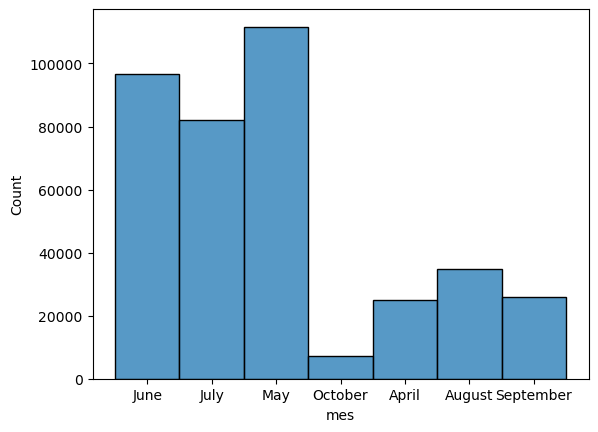

In [23]:
import seaborn as sns

# Assuming df['mes'] contains the months of the year
# Define the order of the months
ordered_months = ['April', 'May', 'June', 'July', 'August', 'September', 'October']
'April','May','June', 'July', 'August', 'September', 'October'
# Plot the histogram with the specified order of months
sns.histplot(data=df, x='mes')

sns.histp

In [18]:
df.año.value_counts()

año
2019    383535
Name: count, dtype: int64

In [137]:
sns.histplot(df['mes'], #ax=axes[0, 0],
             column_order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
# axes[0, 0].set_title('Histograma de Columna 1'

AttributeError: Rectangle.set() got an unexpected keyword argument 'column_order'

In [ ]:


# Crear una cuadrícula de subgráficos con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Trazar el primer gráfico en el primer subgráfico
sns.histplot(df['mes'], ax=axes[0, 0],column_order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
axes[0, 0].set_title('Histograma de Columna 1')

# Trazar el segundo gráfico en el segundo subgráfico
sns.boxplot(df['columna2'], ax=axes[0, 1])
axes[0, 1].set_title('Diagrama de Caja de Columna 2')

# Trazar el tercer gráfico en el tercer subgráfico
sns.scatterplot(x=df['columna3'], y=df['columna4'], ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de dispersión entre Columna 3 y Columna 4')

# Trazar el cuarto gráfico en el cuarto subgráfico
sns.countplot(df['columna5'], ax=axes[1, 1])
axes[1, 1].set_title('Recuento de valores en Columna 5')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [ ]:
sns.subplot

In [82]:
(df.fecha_fin[0] - df.fecha_inicio[0]).total_seconds() / 60


158.0

In [113]:
df.fecha_inicio[0].strftime('%X')

'20:36:00'

In [83]:
df.fecha_fin[0] - df.fecha_inicio[0]

Timedelta('0 days 02:38:00')

In [72]:
df.fecha_inicio[0].month

6

In [46]:
# Comprobamos
df.dtypes

fecha_consulta    datetime64[ns]
fecha_inicio      datetime64[ns]
fecha_fin         datetime64[ns]
ciudad_origen             object
ciudad_destino            object
tipo_tren                 object
tipo_tarifa               object
clase                     object
precio                   float64
dtype: object

In [47]:
# volvemos a hacer un EDA ahora qeu tenemos las fechas en el formato correcto
profile = ProfileReport(df, 
                        title='EDA Renfe trains dataset', 
                        correlations={
                            "auto": {"calculate": True},
                            "spearman": {"calculate": True},
                            "phi_k": {"calculate": True}
                        })
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'MADRID'')
  warnings.warn(
c:\Users\Usuario\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the spearman correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"spearman": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'SEVIL

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
# vamos a ver la distribucion de las fechas, el precio

### Tratamiento Valores nulos y análisis de `precio`

### P7.1: ¿Que porcentaje de valores nulos hay por cada columna?

In [49]:
df.isnull().sum()

# tras un breve vistazo vemos que solo la columna precio tiene nulos

fecha_consulta        0
fecha_inicio          0
fecha_fin             0
ciudad_origen         0
ciudad_destino        0
tipo_tren             0
tipo_tarifa        1338
clase              1338
precio            28515
dtype: int64

In [50]:
# Y hayamos el % de nulos que hay en dicha columna.

round((df.precio.isnull().sum()/df.shape[0])*100,2)

7.43

In [59]:
# imputaremos los nulos acorde a la mediana de cada grupo de tipo de tren.

# para ello creamos un diccionario con los precios medios por tipo de tren:
median_by_group_dict= dict(df.groupby('tipo_tren')['precio'].median())

In [60]:
means_by_group_dict.keys()

dict_keys(['ALVIA', 'AV City', 'AVE', 'AVE-LD', 'AVE-MD', 'AVE-TGV', 'INTERCITY', 'LD', 'LD-AVE', 'LD-MD', 'MD', 'MD-AVE', 'MD-LD', 'R. EXPRES', 'REGIONAL', 'TRENHOTEL'])

In [ ]:
df.fillna(value=median_by_group_dict)

In [61]:

# Calculamos la mediana de 'precio' para cada grupo
median_by_group_dict = df.groupby('tipo_tren')['precio'].median()

# Rellenamos los valores nulos en 'precio' usando la mediana correspondiente para cada grupo
df['precio'] = df.groupby('tipo_tren')['precio'].transform(lambda x: x.fillna(median_by_group_dict[x.name]))

In [62]:
df.isna().sum()
# hemos imputado unos 20.000 Nulos

fecha_consulta       0
fecha_inicio         0
fecha_fin            0
ciudad_origen        0
ciudad_destino       0
tipo_tren            0
tipo_tarifa       1338
clase             1338
precio             570
dtype: int64

In [67]:
df.tipo_tarifa.value_counts(normalize=True)

tipo_tarifa
Promo                     0.70
Flexible                  0.22
Adulto ida                0.06
Promo +                   0.02
COD.PROMOCIONAL           0.00
Individual-Flexible       0.00
Mesa                      0.00
Doble Familiar-Flexible   0.00
4x100                     0.00
Grupos Ida                0.00
Name: proportion, dtype: float64

In [68]:
df.clase.value_counts(normalize=True)

clase
Turista                    0.76
Preferente                 0.10
Turista Plus               0.07
Turista con enlace         0.06
TuristaSólo plaza H        0.01
PreferenteSólo plaza H     0.00
Cama Turista               0.00
Cama G. Clase              0.00
Turista PlusSólo plaza H   0.00
Name: proportion, dtype: float64

In [66]:
plt.hist(x=df.tipo_tarifa)

ConversionError: Failed to convert value(s) to axis units: array(['Flexible', 'Flexible', 'Promo', ..., 'Promo', 'Promo', 'Flexible'],
      dtype=object)

### P7.2: ¿Cual es el mínimo, percentiles importantes (25%, 50%, 75%) y el máximo de `precio`?

In [19]:

df.describe(include='all')

fecha_consulta                   fecha_inicio  \
count                          383535                         383535   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2019-05-29 06:02:15.818107904  2019-06-24 03:35:03.928507136   
min               2019-04-11 21:49:46            2019-04-12 06:08:00   
25%        2019-04-28 01:30:55.500000            2019-05-23 06:08:00   
50%               2019-05-24 07:01:51            2019-06-19 11:44:00   
75%        2019-06-14 05:08:01.500000            2019-07-17 06:11:00   
max               2019-08-22 19:06:26            2019-10-20 21:25:00   
std                               NaN                            NaN   

                            fecha_fin ciudad_origen ciudad_destino tipo_tren  \
count                          383535        383535         383535    383535   
unique                            NaN             5              5        16   
top                               NaN        MADRID         MADRID       AVE   
freq                              NaN        191656         191879    262635   
mean    2019-06-24 06:41:59.036959232           NaN            NaN       NaN   
min               2019-04-12 08:38:00           NaN            NaN       NaN   
25%               2019-05-23 08:40:00           NaN            NaN       NaN   
50%               2019-06-19 15:10:00           NaN            NaN       NaN   
75%               2019-07-17 09:16:00           NaN            NaN       NaN   
max               2019-10-20 23:55:00           NaN            NaN       NaN   
std                               NaN           NaN            NaN       NaN   

       tipo_tarifa    clase         precio  
count       382197   382197  355020.000000  
unique          10        9            NaN  
top          Promo  Turista            NaN  
freq        266484   290733            NaN  
mean           NaN      NaN      61.436162  
min            NaN      NaN       0.000000  
25%            NaN      NaN      41.200000  
50%            NaN      NaN      58.150000  
75%            NaN      NaN      76.300000  
max            NaN      NaN     342.800000  
std            NaN      NaN      25.696218

### P7.3: ¿Hay algo raro en el valor mínimo de `precio`? Quita las filas con ese valor del dataset

In [20]:
# parece que hay filas con valores 0 asignados. Procedemos a eliminarlos

df[df.precio==0]

fecha_consulta        fecha_inicio           fecha_fin  \
121961 2019-06-17 09:01:21 2019-08-03 20:00:00 2019-08-03 23:10:00   
136925 2019-06-13 01:13:29 2019-06-16 12:50:00 2019-06-16 15:45:00   

       ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  
121961     BARCELONA         MADRID       AVE       4x100     Turista     0.0  
136925     BARCELONA         MADRID   AVE-TGV    Flexible  Preferente     0.0

In [21]:
# usamos el metodo .drop() asociado al indice que otorga el output del filtro para eliminar dicho subset
df=df.drop(df[df.precio==0].index)

### P7.4: Reemplaza los valores nulos en `precio` por la media de esa columna

In [22]:
df.precio.fillna(value=df.precio.mean(),inplace=True)
df.precio.isnull().sum()

0

### P7.5: Quita las filas donde `clase` o `tipo_tarifa` sean nulos

In [23]:
# En la columna clase y tipo_tarifa parecce que no hay nulos:

print(df.tipo_tarifa.isnull().sum())
print(df.clase.isnull().sum())

# Pero...

0
0


In [24]:
# Si aplicamos el metodo .value_counts() podemos comprobar que existen nulos pero imputados como nan literales

df.clase.value_counts()

clase
Turista                     290732
Preferente                   37760
Turista Plus                 27069
Turista con enlace           23264
TuristaSólo plaza H           2724
nan                           1338
PreferenteSólo plaza H         343
Cama Turista                   285
Cama G. Clase                   16
Turista PlusSólo plaza H         2
Name: count, dtype: int64

In [25]:
df.tipo_tarifa.value_counts()

tipo_tarifa
Promo                      266484
Flexible                    82347
Adulto ida                  24007
Promo +                      9164
nan                          1338
COD.PROMOCIONAL               168
Individual-Flexible            13
Mesa                            8
Doble Familiar-Flexible         3
Grupos Ida                      1
Name: count, dtype: int64

In [26]:
# procedemos a eliminarlos de nuestra DF

df=df.drop(df[df.tipo_tarifa=='nan'].index)

# diria que no hace falta hacer el mismo procedimiento con clase porque intuyo que serian las mismas filas ya que coinciden en numero, igual nos aseguramos mi rey.
df=df.drop(df[df.clase=='nan'].index)
df.clase.value_counts()

clase
Turista                     290732
Preferente                   37760
Turista Plus                 27069
Turista con enlace           23264
TuristaSólo plaza H           2724
PreferenteSólo plaza H         343
Cama Turista                   285
Cama G. Clase                   16
Turista PlusSólo plaza H         2
Name: count, dtype: int64

## P8: Tiempo de viaje

### P8.1: Calcula el tiempo de viaje en minutos (fecha_fin - fecha_inicio)

In [27]:
# prueba
(df.fecha_fin[0] - df.fecha_inicio[0]).total_seconds()/60

158.0

In [28]:
df['tiempo_de_viaje']= ((df.fecha_fin - df.fecha_inicio).dt.total_seconds())/60

In [29]:
df.columns

Index(['fecha_consulta', 'fecha_inicio', 'fecha_fin', 'ciudad_origen',
       'ciudad_destino', 'tipo_tren', 'tipo_tarifa', 'clase', 'precio',
       'tiempo_de_viaje'],
      dtype='object')

### P8.2: Haz un histograma de la variable que acabas de crear (`tiempo_de_viaje`)

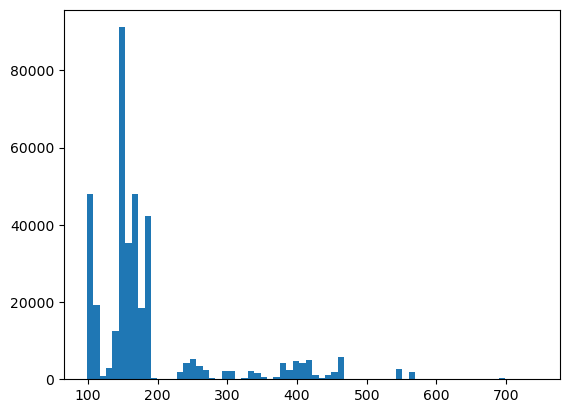

In [30]:


plt.hist(df.tiempo_de_viaje,bins=70)
plt.show()

## P9: Extrae el día, el nombre del día, el mes y la hora de `fecha_inicio`

In [31]:
# Prueba para extraccion de fecha
df.fecha_inicio[0]

Timestamp('2019-06-28 20:36:00')

In [33]:
# podemos utilizar los metodos .day,.month y .hour para extraer dicha informacion en formato numerico, 28, 6, 20 respectivamente teniendo en cuenta el 
# ejemplo de arriba. 
# Pero utilizaremos el metodo strftime() para determinar el dia de la semana, mes y hora concreta (en formato texto) utilizando la nomenclatura 
# aqui descrita (https://strftime.org/) 
print('This train is programed for',
      df.fecha_inicio[0].strftime('%A'),
      df.fecha_inicio[0].day,'th',
      df.fecha_inicio[0].strftime('%B'),
      df.fecha_inicio[0].strftime('%Y'),
      'at',df.fecha_inicio[0].strftime('%H'),':',df.fecha_inicio[0].strftime('%M'))


This train is programed for Friday 28 th June 2019 at 20 : 36


## P10: Quita las columnas `fecha_consulta`, `fecha_inicio` y `fecha_fin` del dataset

In [768]:
df_14=df.copy()
df=df.drop(labels=['fecha_consulta','fecha_inicio','fecha_fin'],axis=1,)

# df_14 es una copia para el ejercicio 14...luego se entiende en dicho ejercicio

In [769]:
df

ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  \
0            SEVILLA         MADRID     ALVIA    Flexible     Turista   67.20   
1          BARCELONA         MADRID       AVE    Flexible     Turista  107.70   
2            SEVILLA         MADRID       AVE       Promo     Turista   47.30   
3           VALENCIA         MADRID  REGIONAL  Adulto ida     Turista   28.35   
4             MADRID      BARCELONA   AVE-TGV       Promo     Turista   66.75   
...              ...            ...       ...         ...         ...     ...   
383563        MADRID       VALENCIA       AVE    Flexible     Turista   73.10   
383564     BARCELONA         MADRID       AVE       Promo  Preferente   54.45   
383565      VALENCIA         MADRID       AVE       Promo     Turista   27.80   
383566        MADRID        SEVILLA       AVE       Promo     Turista   47.30   
383567      VALENCIA         MADRID       AVE    Flexible     Turista   73.10   

        tiempo_de_viaje  
0                 158.0  
1                 190.0  
2                 150.0  
3                 460.0  
4                 179.0  
...                 ...  
383563            109.0  
383564            190.0  
383565            100.0  
383566            141.0  
383567            106.0  

[382195 rows x 7 columns]

## P11: Lee el dataset `coordenadas_ciudades.csv` y únelo con al dataset que has procesado hasta ahora (utiliza `ciudad_destino` para el `join`)

In [770]:
coordenadas_ciudades= pd.read_csv('data/coordenadas_ciudades.csv')
coordenadas_ciudades

ciudad    latitud  longitud
0      MADRID  40.416705 -3.703582
1   BARCELONA  41.382894  2.177432
2     SEVILLA  37.388630 -5.995340
3    VALENCIA  39.469901 -0.375951
4  PONFERRADA  42.545412 -6.593872

In [771]:
# hacemos mediante el metodo .merge() un join con la tabla coordenadas. Usaremos un left join(mantendremos todas las columnas de la tabla original df y añadiremos dos
# nuevas columnas 'latitud' y 'longitud' desde la tabla coordenadas a df. Especificamos con los argumentos left_on y rigth_on las columnas de coincidencia (ya que las
# columnas ciudad y ciudad destino no tienen el mismo nombre)
df= df.merge(coordenadas_ciudades,how='left',left_on='ciudad_destino',right_on='ciudad')
df


ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  \
0            SEVILLA         MADRID     ALVIA    Flexible     Turista   67.20   
1          BARCELONA         MADRID       AVE    Flexible     Turista  107.70   
2            SEVILLA         MADRID       AVE       Promo     Turista   47.30   
3           VALENCIA         MADRID  REGIONAL  Adulto ida     Turista   28.35   
4             MADRID      BARCELONA   AVE-TGV       Promo     Turista   66.75   
...              ...            ...       ...         ...         ...     ...   
382190        MADRID       VALENCIA       AVE    Flexible     Turista   73.10   
382191     BARCELONA         MADRID       AVE       Promo  Preferente   54.45   
382192      VALENCIA         MADRID       AVE       Promo     Turista   27.80   
382193        MADRID        SEVILLA       AVE       Promo     Turista   47.30   
382194      VALENCIA         MADRID       AVE    Flexible     Turista   73.10   

        tiempo_de_viaje     ciudad    latitud  longitud  
0                 158.0     MADRID  40.416705 -3.703582  
1                 190.0     MADRID  40.416705 -3.703582  
2                 150.0     MADRID  40.416705 -3.703582  
3                 460.0     MADRID  40.416705 -3.703582  
4                 179.0  BARCELONA  41.382894  2.177432  
...                 ...        ...        ...       ...  
382190            109.0   VALENCIA  39.469901 -0.375951  
382191            190.0     MADRID  40.416705 -3.703582  
382192            100.0     MADRID  40.416705 -3.703582  
382193            141.0    SEVILLA  37.388630 -5.995340  
382194            106.0     MADRID  40.416705 -3.703582  

[382195 rows x 10 columns]

## P12: Gráfica en un mapa el precio medio por ciudad de destino

In [772]:
# descubrí la maravilla del groupby, creamos una df para procesamiento del mapa mas facil incluyento las coordenadas:
# Ahora ya tenemos una lista de ciudades y coordenadas y las asociaremos por medio de un merge en una tabla con el precio medio
df_map=df.groupby('ciudad_destino')['precio'].mean().round(2).reset_index()
df_map


ciudad_destino  precio
0      BARCELONA   85.36
1         MADRID   60.70
2     PONFERRADA   45.65
3        SEVILLA   58.82
4       VALENCIA   42.64

In [773]:
df_map=df_map[['ciudad_destino','precio']]
df_map=df_map.merge(coordenadas_ciudades,how='left',left_on='ciudad_destino',right_on='ciudad')
df_map

ciudad_destino  precio      ciudad    latitud  longitud
0      BARCELONA   85.36   BARCELONA  41.382894  2.177432
1         MADRID   60.70      MADRID  40.416705 -3.703582
2     PONFERRADA   45.65  PONFERRADA  42.545412 -6.593872
3        SEVILLA   58.82     SEVILLA  37.388630 -5.995340
4       VALENCIA   42.64    VALENCIA  39.469901 -0.375951

In [774]:
# Cambiamos el nombre de la columna para mejorar la presentación del mapa 
df_map.rename(columns={'precio':'precio_medio'},inplace=True)

In [775]:
apikey = 'c9fe15c792804d66bbb650deb251abb5'

# importamos datos usando folium y la maravillosa utilidad de los customs tiles  y ajustamos parametros.


mapa = folium.Map(
    location=[40.416705, -3.703582],
    tiles=f'https://{{s}}.tile.thunderforest.com/spinal-map/{{z}}/{{x}}/{{y}}.png?apikey={apikey}',
    attr='&copy; <a href="http://www.thunderforest.com/">Thunderforest</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
    maxZoom=22,
    zoom_start=6)


for idx, row in df_map.iterrows():
    folium.Circle(
        location=(row["latitud"], row["longitud"]),
        radius=row["precio_medio"] *600,
        # Aqui en radius he intentado imputar la operacion para sacar el precio medio pero me daba error siempre.
        #  Se podria poner sin tener que crear una columna nueva llamada 'precio_medio'?
        fill=True,
        fill_opacity=1,
        color="red",
        tooltip=f"""
        <ul>
            <li>City: {row["ciudad_destino"]}</li>
            <li>Price: {row["precio_medio"]}</li>
        </ul>
        """
       
    ).add_to(mapa)
mapa

# ase caloh eh killo

## P13: Haz una tabla de correlación, ¿hay variables númericas correladas con el precio?

In [776]:
# creamos un df aislando las variables numericas que nos interesan analizar con la correlacion.

df_corr= df[['precio','tiempo_de_viaje']]
df_corr

precio  tiempo_de_viaje
0        67.20            158.0
1       107.70            190.0
2        47.30            150.0
3        28.35            460.0
4        66.75            179.0
...        ...              ...
382190   73.10            109.0
382191   54.45            190.0
382192   27.80            100.0
382193   47.30            141.0
382194   73.10            106.0

[382195 rows x 2 columns]

In [777]:
df_corr.corr()

# observamos una correlacion negativa de asociaion mediana (entre 0.1 y 0.3). Esto se traduce que cuando una aumenta la otra disminuye ligeramente? vamos a hacer un scatter plot para
# verlo

precio  tiempo_de_viaje
precio           1.000000        -0.226549
tiempo_de_viaje -0.226549         1.000000

<Axes: xlabel='precio', ylabel='tiempo_de_viaje'>

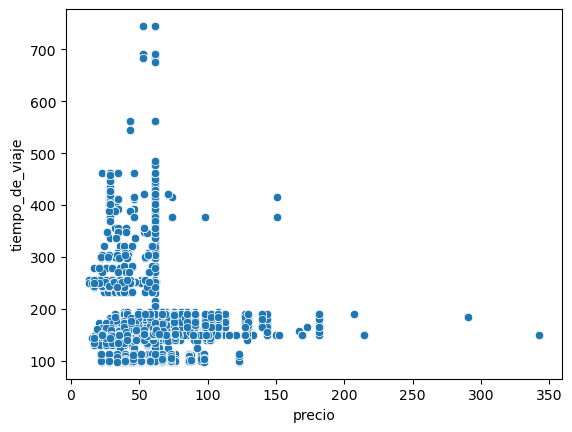

In [778]:

sns.scatterplot(data=df_corr,x='precio',y='tiempo_de_viaje')

# ahora tenemos un poquito mas de vision sobre la relacion de las dos variables y podemos afirmar que existen 2 clusters...intuyo que deberiamos relacionarlo con el tipo de 
# tren (AVE, cercanias, regional...)

# ME HUBIERA GUSTADO PINTAR LA LINEA DE LA CORRELACION SOLO POR CURIOSIDAD, PERO NO HE PODIDO. SE PUEDE HACER?

## P14: Relación entre variables del dataset y `precio`

### P14.1: Haz un scatter plot de precio vs. tiempo de viaje

<Axes: xlabel='precio', ylabel='tiempo_de_viaje'>

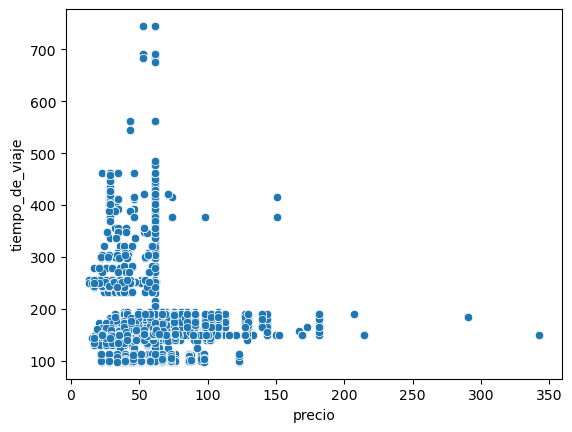

In [779]:
sns.scatterplot(data=df_corr,x='precio',y='tiempo_de_viaje')

### P14.2: Haz un boxplot de precio vs. dia de la semana

In [780]:
'''
sns.boxplot(data=df,x=JAJA,y='precio')
'''
# pero no habiamos quedado en eliminar esa variable?
# vamos a ver qué puedo hacer, voy a cacharrear...recordando el ejercicio 10 donde eliminamos las columnas de tiempo, hemos rescatado una copia antes de eliminarlas 
# y almacenadas en df_14
df_14



fecha_consulta        fecha_inicio           fecha_fin  \
0      2019-05-25 01:43:03 2019-06-28 20:36:00 2019-06-28 23:14:00   
1      2019-06-22 13:05:11 2019-07-14 10:00:00 2019-07-14 13:10:00   
2      2019-04-17 06:24:03 2019-05-23 13:40:00 2019-05-23 16:10:00   
3      2019-05-10 21:21:59 2019-05-29 14:50:00 2019-05-29 22:30:00   
4      2019-05-09 19:43:37 2019-06-26 13:25:00 2019-06-26 16:24:00   
...                    ...                 ...                 ...   
383563 2019-05-06 05:11:53 2019-05-10 19:40:00 2019-05-10 21:29:00   
383564 2019-06-19 21:48:56 2019-08-05 20:00:00 2019-08-05 23:10:00   
383565 2019-04-24 23:21:44 2019-04-29 16:15:00 2019-04-29 17:55:00   
383566 2019-05-27 21:05:19 2019-07-07 15:00:00 2019-07-07 17:21:00   
383567 2019-05-27 15:04:14 2019-06-16 18:35:00 2019-06-16 20:21:00   

       ciudad_origen ciudad_destino tipo_tren tipo_tarifa       clase  precio  \
0            SEVILLA         MADRID     ALVIA    Flexible     Turista   67.20   
1          BARCELONA         MADRID       AVE    Flexible     Turista  107.70   
2            SEVILLA         MADRID       AVE       Promo     Turista   47.30   
3           VALENCIA         MADRID  REGIONAL  Adulto ida     Turista   28.35   
4             MADRID      BARCELONA   AVE-TGV       Promo     Turista   66.75   
...              ...            ...       ...         ...         ...     ...   
383563        MADRID       VALENCIA       AVE    Flexible     Turista   73.10   
383564     BARCELONA         MADRID       AVE       Promo  Preferente   54.45   
383565      VALENCIA         MADRID       AVE       Promo     Turista   27.80   
383566        MADRID        SEVILLA       AVE       Promo     Turista   47.30   
383567      VALENCIA         MADRID       AVE    Flexible     Turista   73.10   

        tiempo_de_viaje  
0                 158.0  
1                 190.0  
2                 150.0  
3                 460.0  
4                 179.0  
...                 ...  
383563            109.0  
383564            190.0  
383565            100.0  
383566            141.0  
383567            106.0  

[382195 rows x 10 columns]

<Axes: xlabel='dia_semana', ylabel='precio'>

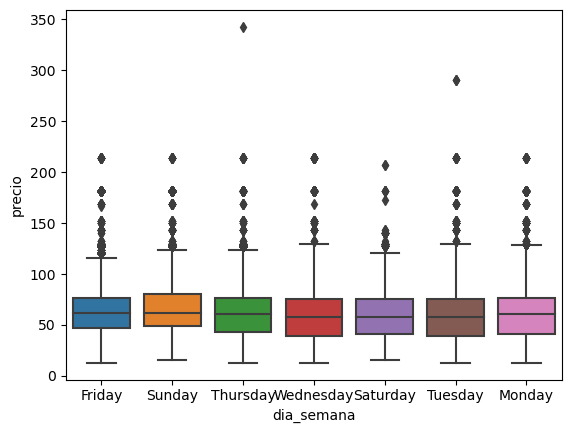

In [781]:
df_14['dia_semana']=df_14.fecha_inicio.dt.strftime('%A')
# vamos a crear una nueva columna almacenando el dia de la semana en concreto para poder cruzar los datos dia VS precio
# y ahora si...
sns.boxplot(data=df_14,x='dia_semana',y='precio')

### P14.3: Gráfica el precio medio por día de la semana

In [782]:
# Sacamos de df_14 un DF que extraiga el dia de la semana por el precio medio:
df_14_3=df_14.groupby('dia_semana')['precio'].mean().reset_index()
df_14_3

dia_semana     precio
0     Friday  65.377658
1     Monday  61.050589
2   Saturday  57.913801
3     Sunday  67.219011
4   Thursday  60.748076
5    Tuesday  58.019438
6  Wednesday  59.149415

<Axes: xlabel='dia_semana', ylabel='precio'>

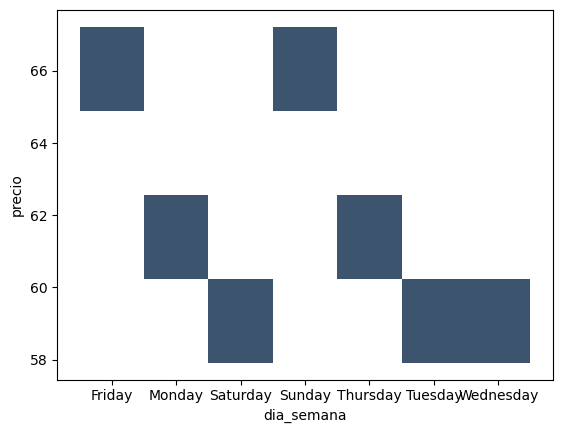

In [783]:
# graficamos el precio medio por dia de la semana:
sns.histplot(data=df_14_3,x='dia_semana',y='precio',)

# no se, no me esperaba la represetnacion asi pero podria cuadrarme, viernes y domingo son los billetes mas caros

## P15: Crea un nuevo dataframe donge apliques *one-hot-encoding* a las variables categoricas

In [784]:
ohe=pd.get_dummies(df)
ohe

precio  tiempo_de_viaje    latitud  longitud  ciudad_origen_BARCELONA  \
0        67.20            158.0  40.416705 -3.703582                    False   
1       107.70            190.0  40.416705 -3.703582                     True   
2        47.30            150.0  40.416705 -3.703582                    False   
3        28.35            460.0  40.416705 -3.703582                    False   
4        66.75            179.0  41.382894  2.177432                    False   
...        ...              ...        ...       ...                      ...   
382190   73.10            109.0  39.469901 -0.375951                    False   
382191   54.45            190.0  40.416705 -3.703582                     True   
382192   27.80            100.0  40.416705 -3.703582                    False   
382193   47.30            141.0  37.388630 -5.995340                    False   
382194   73.10            106.0  40.416705 -3.703582                    False   

        ciudad_origen_MADRID  ciudad_origen_PONFERRADA  ciudad_origen_SEVILLA  \
0                      False                     False                   True   
1                      False                     False                  False   
2                      False                     False                   True   
3                      False                     False                  False   
4                       True                     False                  False   
...                      ...                       ...                    ...   
382190                  True                     False                  False   
382191                 False                     False                  False   
382192                 False                     False                  False   
382193                  True                     False                  False   
382194                 False                     False                  False   

        ciudad_origen_VALENCIA  ciudad_destino_BARCELONA  ...  clase_Turista  \
0                        False                     False  ...           True   
1                        False                     False  ...           True   
2                        False                     False  ...           True   
3                         True                     False  ...           True   
4                        False                      True  ...           True   
...                        ...                       ...  ...            ...   
382190                   False                     False  ...           True   
382191                   False                     False  ...          False   
382192                    True                     False  ...           True   
382193                   False                     False  ...           True   
382194                    True                     False  ...           True   

        clase_Turista Plus  clase_Turista PlusSólo plaza H  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   
...                    ...                             ...   
382190               False                           False   
382191               False                           False   
382192               False                           False   
382193               False                           False   
382194               False                           False   

        clase_Turista con enlace  clase_TuristaSólo plaza H  ciudad_BARCELONA  \
0                          False                      False             False   
1                          False                      False             False   
2                          False                      False             False   
3                          False